# CSE 4020 DATABASE SYSTEMS

## Activity 2

### Name: Riad Mohammed

#### Question 1: (10 points) In a Jupyter Notebook, write code either in Python, Java or C to connect to your AWS RDS instance and insert the data from each of the CSV files into the RDS database that you created on AWS on Activity 1. Display the number of rows affected for each table (1 cumulative count for all inserts per table).


In [115]:
import mysql.connector
import csv

In [116]:
def batch_execute(conn):
    cursor = conn.cursor()
    cursor.execute('USE bank')
    
    table_cases = ['branch', 'account', 'loan' ]
    tables = ['branch', 'account', 'customer', 'depositor', 'loan', 'borrower']
    
   # cursor.execute('ALTER TABLE account MODIFY account_number varchar(30);')
   # conn.comit()
    
    for name in tables:
        rows=[]
        fp = open(name + '.csv','r')
        csv_reader = csv.reader(fp)
        next(csv_reader)
        
        for row in csv_reader:
            if name in table_cases:
                row[2] = int(row[2])
                
            rows.append(tuple(row))
            
        fp.close()
        
        sql_command = f'INSERT INTO {name} VALUES (%s{", %s"  * (len(rows[0]) -1)});'
        cursor.executemany(sql_command, rows)
        conn.commit()
        
        print(f'Rows affected in {name}: {cursor.rowcount}')
              
    conn.close()

In [117]:
def main():
    host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
    user = 'admin'
    password = "Kisscake12!"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    batch_execute(conn)
main()

Rows affected in branch: 9
Rows affected in account: 9
Rows affected in customer: 15
Rows affected in depositor: 10
Rows affected in loan: 9
Rows affected in borrower: 10


#### Question 2

#### Write code to issue queries on your database and display your results for the following scenarios. Make sure to print out a tabulation of your branch table ordered by assets in descending order to show the data before and after the changes. A branch of the bank is considered a large branch if it has assets >= 3 million dollars. Imagine that COVID19 affected the bank terribly and the branches with assets >= 3 million dollars had to liquidate 12.5% of their assets to help the smaller branches (branches with assets < 3 million dollars).


#### (a) (3 points) Issue a query that returns the total amount to be liquidated

In [118]:
import mysql.connector
host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
user = 'admin'
password = "Kisscake12!"
conn = mysql.connector.connect(host=host,user=user,password=password)

cursor=conn.cursor()
cursor.execute('USE bank')
query="select sum(assets *0.125)from branch where (assets >=3000000);"
cursor.execute(query)
##print
total = cursor.fetchone()[0]
print(f'Total amount to be liquidated: ${total}')
conn.close()

Total amount to be liquidated: $2337500.00000


#### (b) (3 points) Issue an update query that reduces the assets for the large branches by the liquidation formula above.


In [119]:
import mysql.connector
host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
user = 'admin'
password = "Kisscake12!"
conn = mysql.connector.connect(host=host,user=user,password=password)

cursor=conn.cursor()
cursor.execute('USE bank')

query="update branch set assets=(assets-(assets*0.125)) where (assets >=3000000);"
cursor.execute(query)
conn.commit()
conn.close()

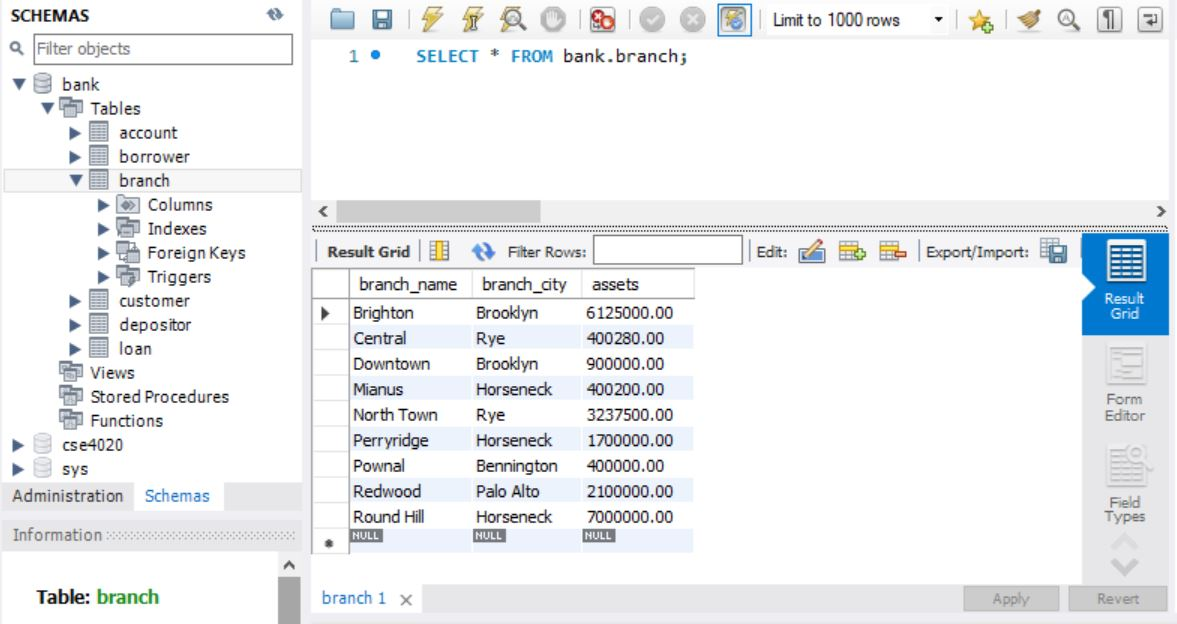

#### Above shows the updated branch table after update query

#### (c) (4 points) Issue an update query that divides equally the total amount liquidated among the small branches.


In [120]:
#print(total)
import mysql.connector
host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
user = 'admin'
password = "Kisscake12!"
conn = mysql.connector.connect(host=host,user=user,password=password)
cursor=conn.cursor()
cursor.execute('USE bank')

query="select count(branch_name)from branch where (assets<3000000)"
cursor.execute(query)
amount_small=cursor.fetchone()[0]
#print(amount_small)

query="select branch.branch_name,branch.branch_city,branch.assets from branch ORDER BY assets DESC"

cursor.execute(query)
results=cursor.fetchall()

print ("{:<20} {:<20} {:<20}".format('branch_name','branch_city','assets'))
for name in results:
    branch_name,branch_city,assets=name
    print ("{:<20} {:<20} {:<20}".format(branch_name,branch_city,assets))

query="update branch set assets=assets + %s where assets<3000000"%(total/amount_small)
cursor.execute(query)
conn.commit()

amount_liq = cursor.fetchall()
#print(amount_liq)


conn.close()

branch_name          branch_city          assets              
Round Hill           Horseneck            7000000.00          
Brighton             Brooklyn             6125000.00          
North Town           Rye                  3237500.00          
Redwood              Palo Alto            2100000.00          
Perryridge           Horseneck            1700000.00          
Downtown             Brooklyn             900000.00           
Central              Rye                  400280.00           
Mianus               Horseneck            400200.00           
Pownal               Bennington           400000.00           


#### Above Output shows data before updated branch

In [121]:
import mysql.connector
host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
user = 'admin'
password = "Kisscake12!"
conn = mysql.connector.connect(host=host,user=user,password=password)
cursor=conn.cursor()
cursor.execute('USE bank')

query="select branch.branch_name,branch.branch_city,branch.assets from branch ORDER BY assets DESC"

cursor.execute(query)
results=cursor.fetchall()

print ("{:<20} {:<20} {:<20}".format('branch_name','branch_city','assets'))
for name in results:
    branch_name,branch_city,assets=name
    print ("{:<20} {:<20} {:<20}".format(branch_name,branch_city,assets))
    


branch_name          branch_city          assets              
Round Hill           Horseneck            7000000.00          
Brighton             Brooklyn             6125000.00          
North Town           Rye                  3237500.00          
Redwood              Palo Alto            2489583.33          
Perryridge           Horseneck            2089583.33          
Downtown             Brooklyn             1289583.33          
Central              Rye                  789863.33           
Mianus               Horseneck            789783.33           
Pownal               Bennington           789583.33           


#### Above Output shows data after updated branch

#### (d) (5 points) Display a tabulation showing the customer_name, customer_city, and account_number of all customers who are members of a small branch. Include the branch_name and assets in your results and order your results by assets in descending order

In [122]:
import mysql.connector
host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
user = 'admin'
password = "Kisscake12!"
conn = mysql.connector.connect(host=host,user=user,password=password)

cursor=conn.cursor()
cursor.execute('USE bank')

query="""select customer.customer_name ,customer.customer_city, depositor.account_number ,account.branch_name,branch.assets 
         from (customer inner join depositor on customer.customer_name=depositor.customer_name) natural join (branch inner join account on branch.branch_name=account.branch_name) where branch.assets <3000000 
         ORDER BY assets DESC"""

cursor.execute(query)
results=cursor.fetchall()
print ("{:<20} {:<20} {:<20} {:<20} {:<20}".format('customer_name','customer_city','account_number','branch_name','assets'))
for name in results:
    customer_name,customer_city,account_number,branch_name,assets=name
    print ("{:<20} {:<20} {:<20} {:<20} {:<20}".format(customer_name,customer_city,account_number,branch_name,assets))
conn.close()



customer_name        customer_city        account_number       branch_name          assets              
Lindsay              Pittsfield           A-222                Redwood              2489583.33          
Hayes                Harrison             A-102                Perryridge           2089583.33          
Johnson              Palo Alto            A-201                Perryridge           2089583.33          
Hayes                Harrison             A-101                Downtown             1289583.33          
Johnson              Palo Alto            A-101                Downtown             1289583.33          
Majeris              Rye                  A-333                Central              789863.33           
Smith                Rye                  A-215                Mianus               789783.33           
